In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
from collections import defaultdict
from IPython.display import display
import seaborn as sns
from scipy import stats

In [12]:
participants = ["04","05", "06", "07", "09", "10", "11", "12"]
conditions =["NoAvatar", "Normal", "Small", "Large"]
questions = {
        
         1: "It felt like the virtual body was my body." ,
         2: "It felt like the virtual body parts were my body parts." ,
         3: "The virtual body felt like a human body." ,
         4 :"It felt like the virtual body belonged to me." ,
        
         5: "The movements of the virtual body felt like they were my movements." ,
         6: "I felt like I was controlling the movements of the virtual body." ,
         7: "I felt like I was causing the movements of the virtual body." ,
         8: "The movements of the virtual body were in sync with my own movements." ,
    
         9: "I felt like the form or appearance of my own body had changed." ,
         10: "I felt like the weight of my own body had changed." ,
         11: "I felt like the size (height) of my own body had changed." ,
         12: "I felt like the width of my own body had changed." ,

    }

In [13]:
data = {}
for c in conditions:
    temp = []    
    for p in participants:
             d = pd.read_csv("C:/Users/LauflaborVR2/GS-MT_Test/data/" + p + c + "csv", names= ["Question", "Value"])
             temp.append(d)
    data[c] = temp

In [15]:
small = defaultdict(list)
large =defaultdict(list)
normal = defaultdict(list)
noAvatar = defaultdict(list)
for p in range(len(participants)):
        small["Ownership"].append(data["Small"][p].loc[data["Small"][p]["Question"]<5]["Value"].sum(axis=0)/4)
        small["Agency"].append(data["Small"][p].loc[(data["Small"][p]["Question"] > 4) & (data["Small"][p]["Question"]<9) ]["Value"].sum(axis=0)/4)
        small["Change"].append(data["Small"][p].loc[data["Small"][p]["Question"]>8]["Value"].sum(axis=0)/4)
        large["Ownership"].append(data["Large"][p].loc[data["Large"][p]["Question"]<5]["Value"].sum(axis=0)/4)
        large["Agency"].append(data["Large"][p].loc[(data["Large"][p]["Question"] > 4) & (data["Large"][p]["Question"]<9) ]["Value"].sum(axis=0)/4)
        large["Change"].append(data["Large"][p].loc[data["Large"][p]["Question"]>8]["Value"].sum(axis=0)/4)
        normal["Ownership"].append(data["Normal"][p].loc[data["Normal"][p]["Question"]<5]["Value"].sum(axis=0)/4)
        normal["Agency"].append(data["Normal"][p].loc[(data["Normal"][p]["Question"] > 4) & (data["Normal"][p]["Question"]<9) ]["Value"].sum(axis=0)/4)
        normal["Change"].append(data["Normal"][p].loc[data["Normal"][p]["Question"]>8]["Value"].sum(axis=0)/4)
        noAvatar["Ownership"].append(data["NoAvatar"][p].loc[data["NoAvatar"][p]["Question"]<5]["Value"].sum(axis=0)/4)
        noAvatar["Agency"].append(data["NoAvatar"][p].loc[(data["NoAvatar"][p]["Question"] > 4) & (data["NoAvatar"][p]["Question"]<9) ]["Value"].sum(axis=0)/4)
        noAvatar["Change"].append(data["NoAvatar"][p].loc[data["NoAvatar"][p]["Question"]>8]["Value"].sum(axis=0)/4)
        

In [16]:
dicts = [noAvatar, normal, small, large ]
keys = small.keys()


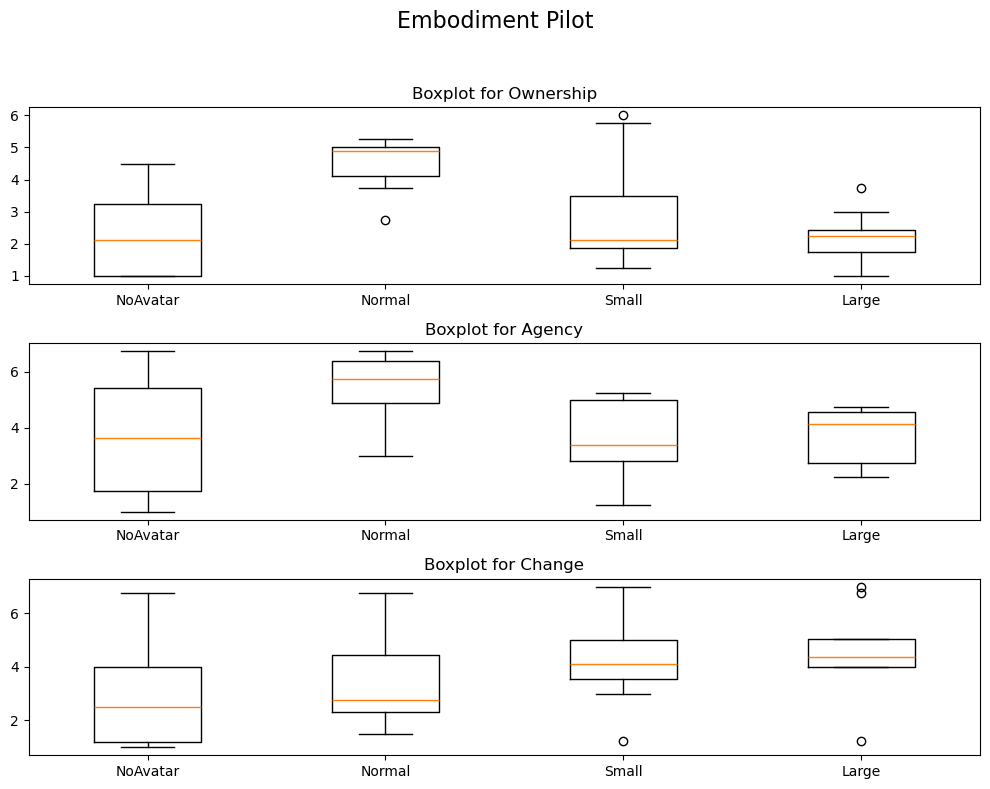

In [18]:
fig, axes = plt.subplots(nrows=len(keys), ncols=1, figsize=(10, 8))
for i, key in enumerate(keys):
    # Collect data for the current key from all defaultdicts
    dat = [d[key] for d in dicts]
    # Flatten the list of lists and add a label for each defaultdict
    data_flat = [item for sublist in dat for item in sublist]
    labels = conditions
    
    # Create a boxplot
    axes[i].boxplot(dat)
    axes[i].set_title(f'Boxplot for {key}')
    axes[i].set_xticklabels([conditions[j] for j in range(len(dicts))])

# Set overall title and show plot
fig.suptitle('Embodiment Pilot', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=len(keys), ncols=1, figsize=(10, 8))
for i, key in enumerate(keys):
    for j, d in enumerate(dicts):
        axes[i].plot(d[key], label=conditions[j])
    
    axes[i].set_title(f'Values for {key}')
    axes[i].legend()

# Set overall title and show plot
fig.suptitle('Test', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

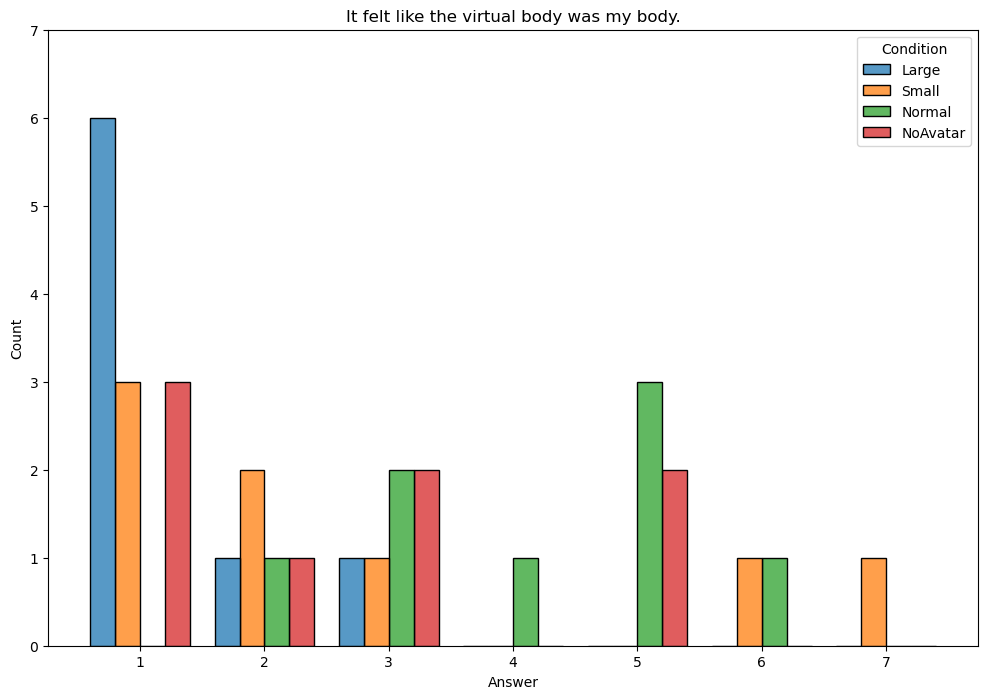

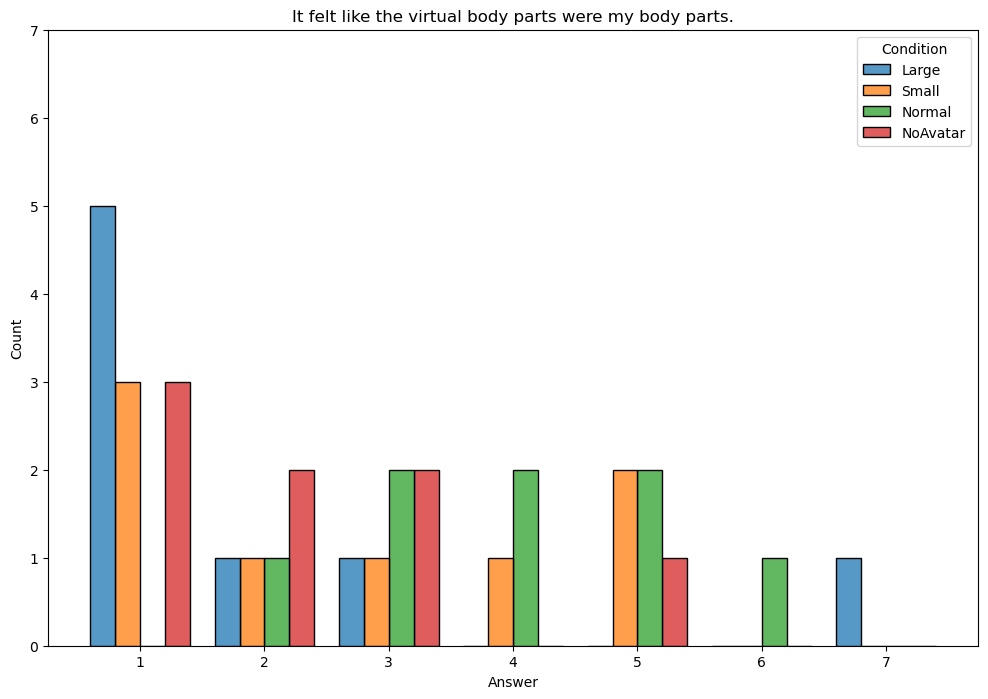

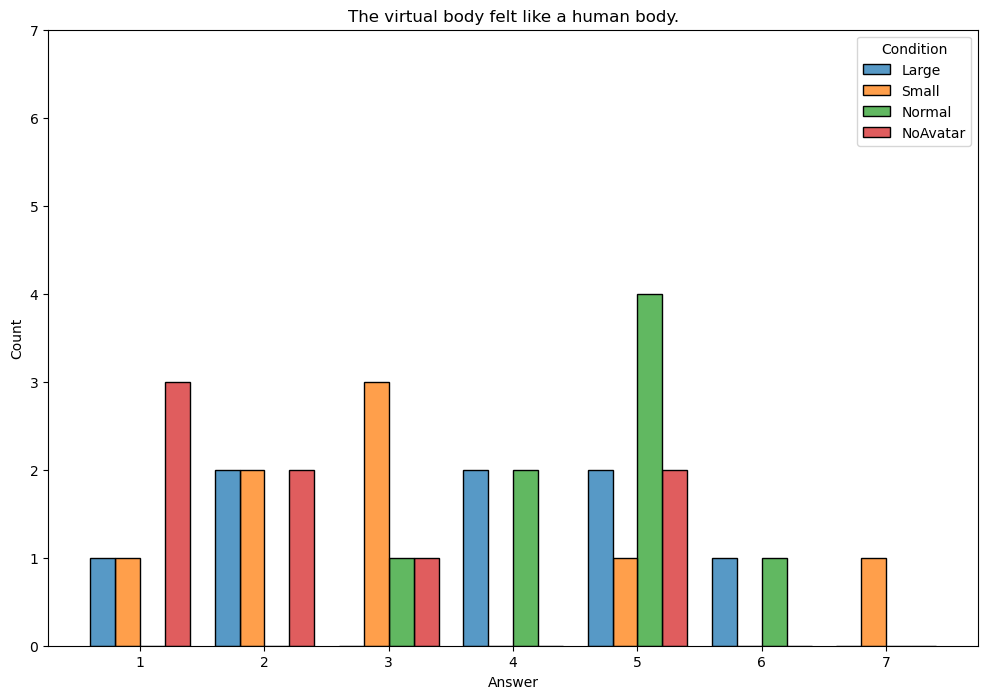

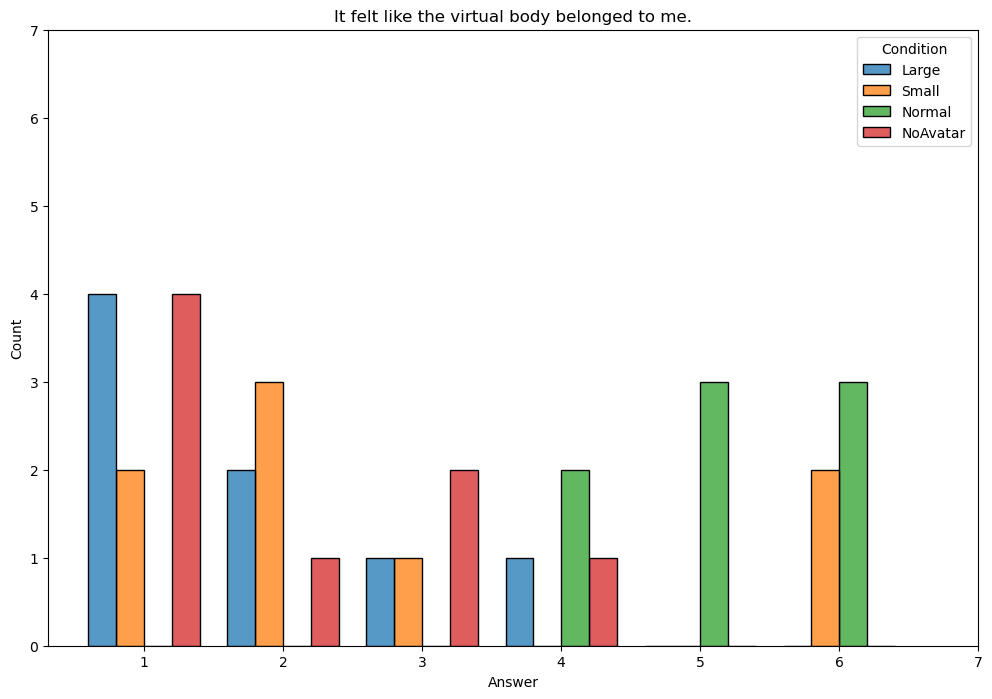

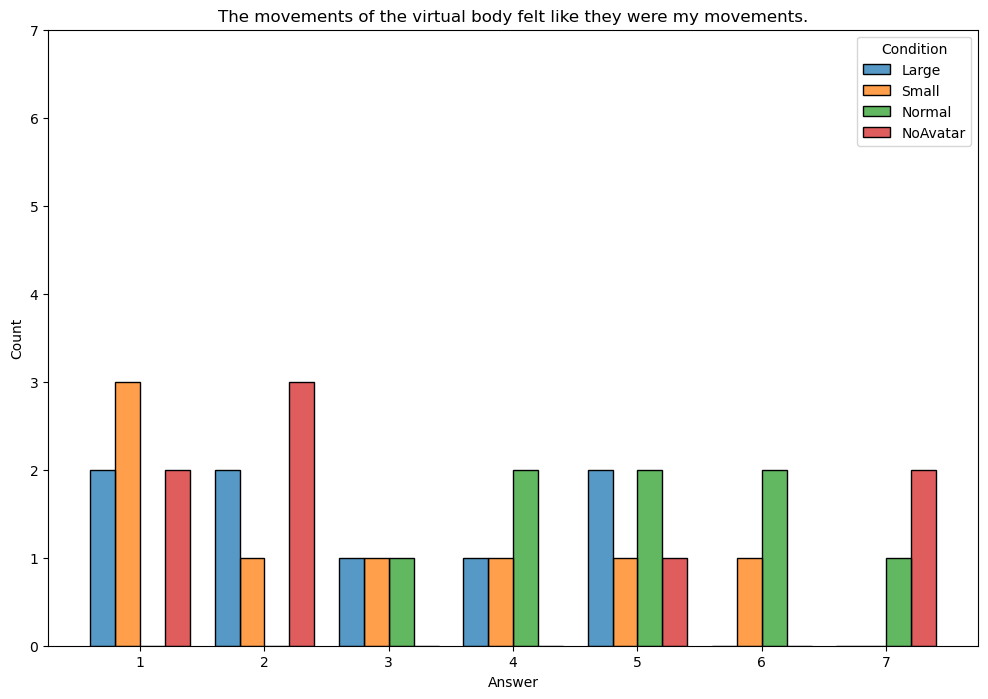

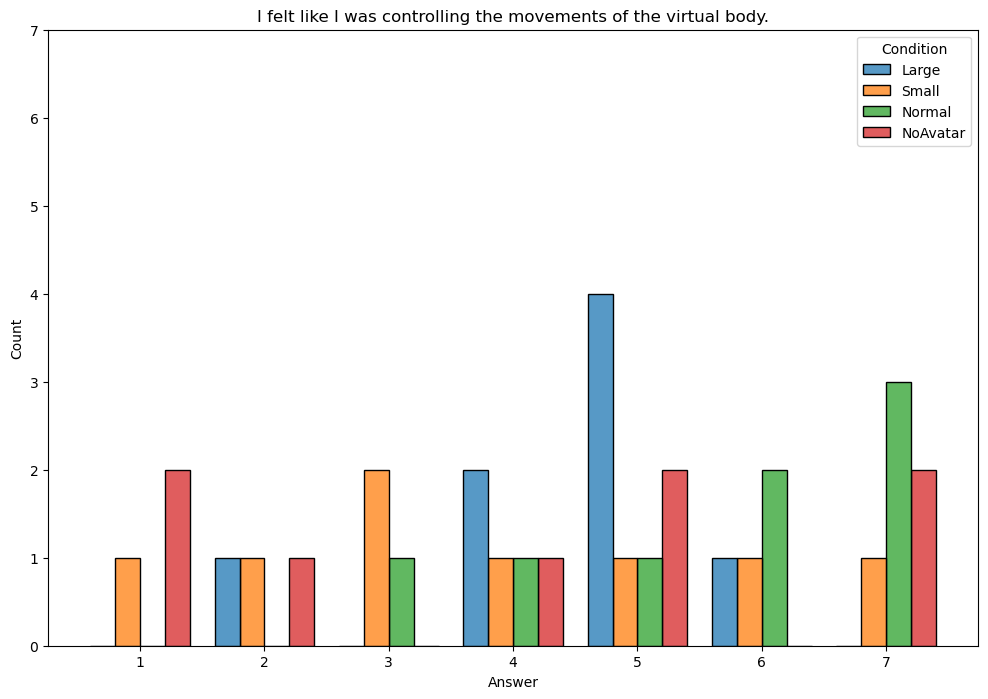

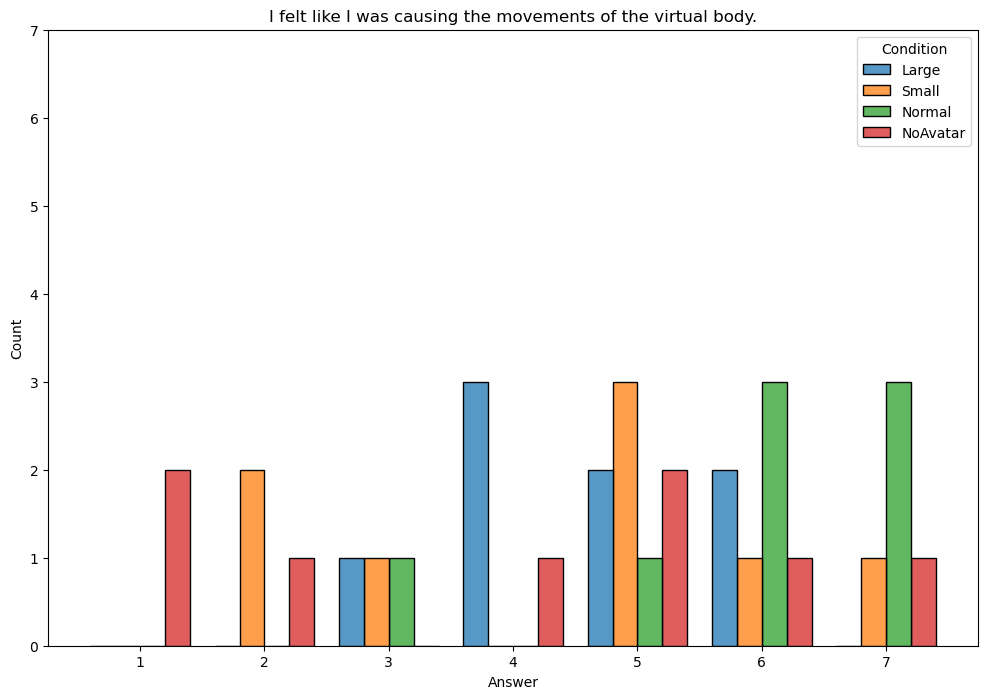

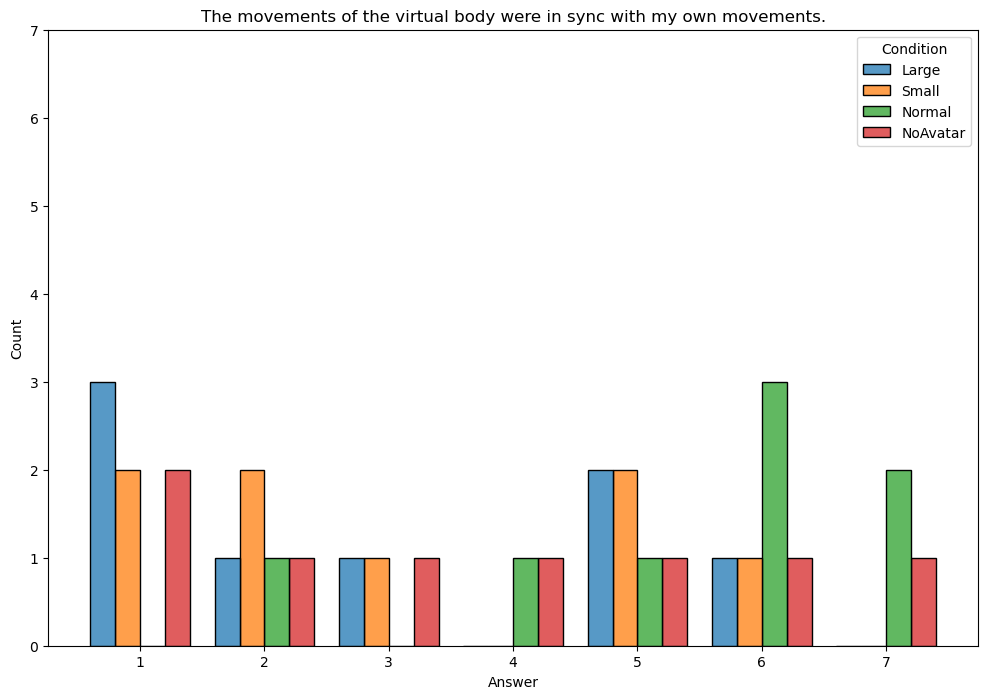

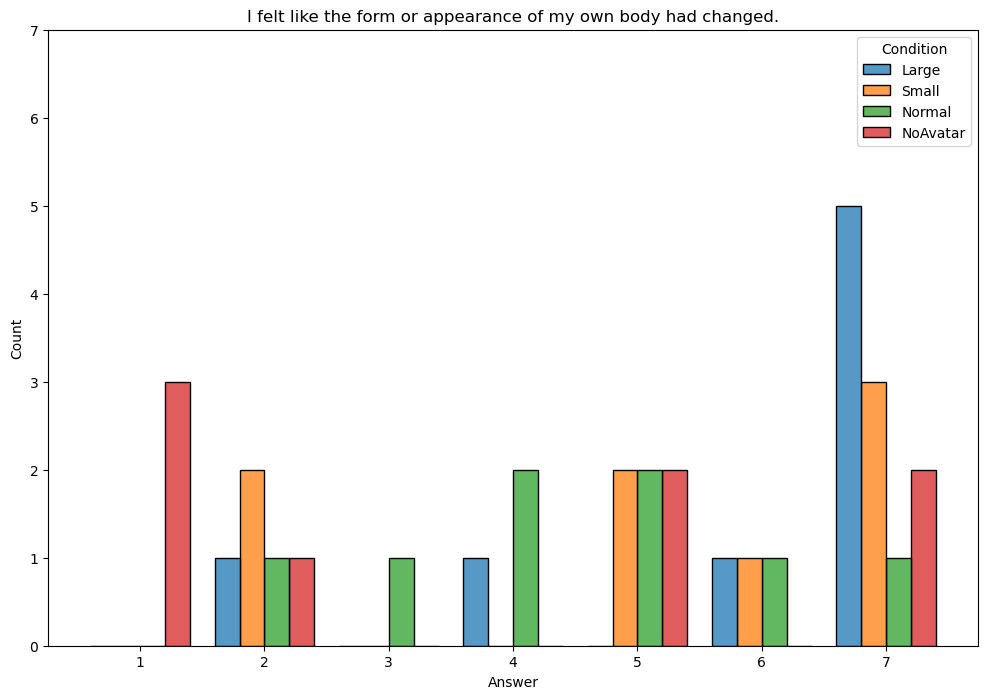

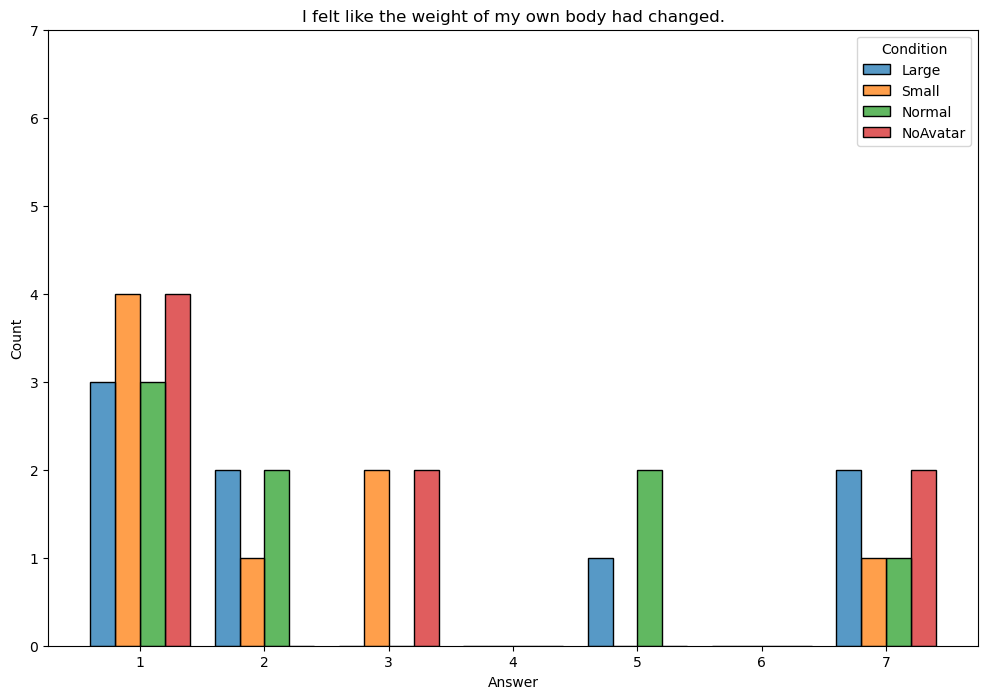

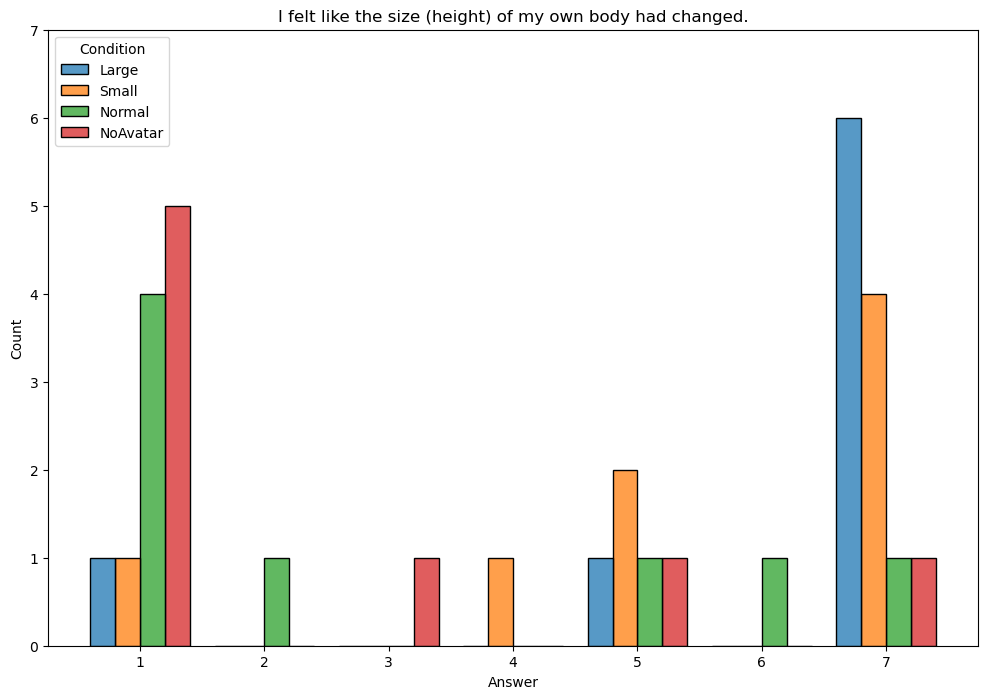

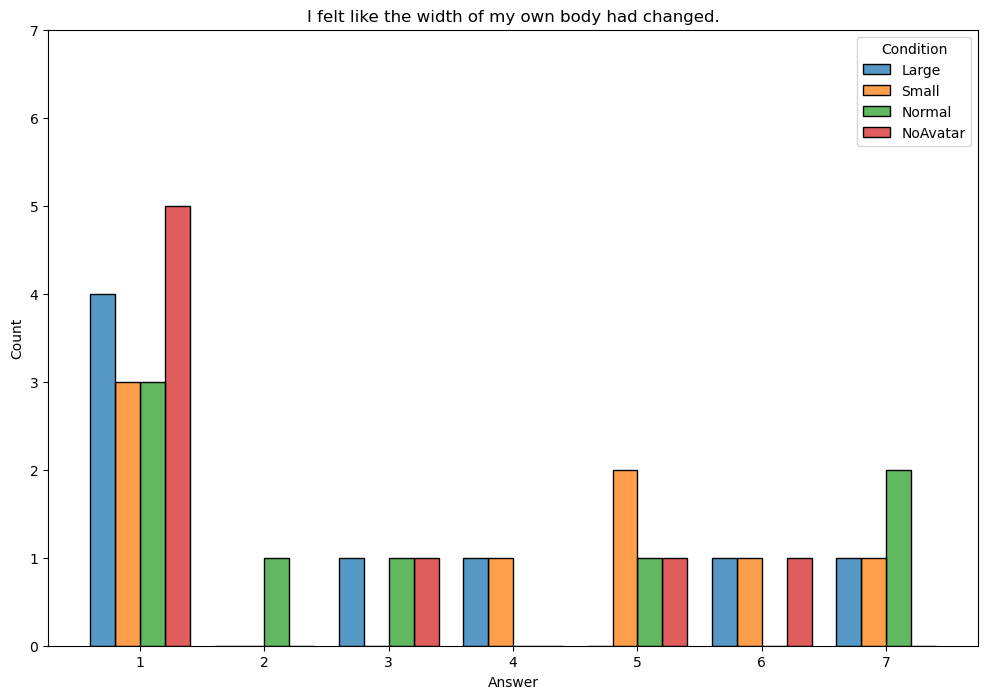

In [19]:
#histogram
consolidated_data = {}
for condition, dfs in data.items():
    consolidated_data[condition] = pd.concat(dfs, ignore_index=True)
    consolidated_data[condition]["Condition"] = condition
consolidated_data

df = pd.concat([consolidated_data["Large"], consolidated_data["Small"], consolidated_data["Normal"], consolidated_data["NoAvatar"]])
# Plot histograms
for q in questions:
    plt.figure(figsize=(12, 8))
    sns.histplot(df.loc[df["Question"]==q], x= "Value", kde=False, stat= "count", discrete= True, label = condition, hue = "Condition" , multiple= "dodge", shrink= .8)
    plt.title(f'{questions[q]}')
    plt.xlabel('Answer')
    plt.xticks(range(df['Value'].min(), df['Value'].max() + 1))
    
    plt.ylabel('Count')
    plt.yticks(range(0, len(participants)))
    plt.show()

In [34]:
 #anova between all conditions 
stats.f_oneway( consolidated_data["NoAvatar"]["Value"], consolidated_data["Normal"]["Value"], consolidated_data["Small"]["Value"], consolidated_data["Large"]["Value"])
# muss ich mich noch mal reinlesen was hier passend ist

F_onewayResult(statistic=8.327075186863697, pvalue=2.2407635390415145e-05)

In [ ]:
stats.ttest_ind(consolidated_data["NoAvatar"]["Value"], consolidated_data["Normal"]["Value"])

In [24]:
consolidated_data["NoAvatar"]["Value"]

0     2
1     2
2     2
3     1
4     7
     ..
91    6
92    5
93    1
94    1
95    3
Name: Value, Length: 96, dtype: int64

Presence questionaire

In [ ]:
demographic_labels = ["Gender", "Age", "Height", "Weight"]
vr_labels = ["VR Experience","VR Usage","First Person Video Games", "Motion Sickness"]

In [ ]:
soci_data = pd.read_csv("C:/Users/LauflaborVR2/GS-MT_Test/data/data_vr_walking_with_avatars_2024-07-09_16-00.csv")
soci_data

In [ ]:
demo_data = soci_data[demographic_labels]
vr_data = soci_data[vr_labels]
ipq_data = soci_data.drop(demographic_labels + vr_labels, axis= 1)


In [ ]:
numeric_summary = demo_data.describe().loc[["mean", "std"]]
categorical_summary = demo_data.select_dtypes(include=['object']).apply(pd.Series.value_counts)
display(numeric_summary)
display(categorical_summary)
ipq_per_question = ipq_data.describe().loc[["mean", "std"]]
display(ipq_per_question)




In [ ]:
#remove the question with a reversed scale
ipq11 = ipq_data.drop(["Presence 4: How real did the virtual world seem to you?", "VPID", "Presence 6: How real did the virtual world seem to you?","Presence 7: How aware were you of the real world surrounding while navigating in the virtual world? (i.e. sounds, room temperature, other people, etc.)?" ], axis=1)
display(ipq11.describe().loc[["mean", "std"]].mean(axis=1))